# Finding the threshold value. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [55]:
df = pd.read_csv("geelong_data.csv")
df

,Unnamed: 0,WebID,Area,Total dwellings_2016,Total dwellings_2011,Total dwellings_2006,Total dwellings_2001,Train_2016,Train_2011,Train_2006,Train_2001,pop_2016,pop_2011,pop_2006,pop_2001
0,0,270,Leopold,5219,4075,3318,2839,107,75,80,66,12814,10117,8818,7654
1,1,330,North Geelong - Rippleside,1601,1326,1309,1279,114,80,48,45,3843,2893,3026,2955
2,2,130,Bell Post Hill,2171,2165,2116,2053,64,32,50,58,4914,5016,5135,5370
3,3,110,Barwon Heads - Connewarre - Breamlea,2558,2345,1827,1827,97,74,24,18,4554,4046,2873,2953
4,4,190,East Geelong,1832,1756,1780,1742,117,107,56,70,3865,3812,3843,3742
5,5,420,Whittington,1839,1778,1714,1680,35,24,13,22,3879,4068,4052,4239
6,6,370,Rural North,652,668,638,651,38,34,34,31,1734,1608,1769,1676
7,7,320,Norlane - North Shore,4342,3936,3922,4000,80,27,80,56,8669,8314,8229,8975
8,8,150,Clifton Springs,3412,3271,3039,2632,66,54,26,25,7521,7554,7206,6826
9,9,170,Curlewis,614,100,93,85,15,0,1,1,1557,222,210,242


In [0]:
# droping the columns "Unnamed" and "WebID":
df.drop(['Unnamed: 0','WebID'], axis = 1, inplace = True) 

In [5]:
df.head()

,Area,Total dwellings_2016,Total dwellings_2011,Total dwellings_2006,Total dwellings_2001,Train_2016,Train_2011,Train_2006,Train_2001,pop_2016,pop_2011,pop_2006,pop_2001
0,Leopold,5219,4075,3318,2839,107,75,80,66,12814,10117,8818,7654
1,North Geelong - Rippleside,1601,1326,1309,1279,114,80,48,45,3843,2893,3026,2955
2,Bell Post Hill,2171,2165,2116,2053,64,32,50,58,4914,5016,5135,5370
3,Barwon Heads - Connewarre - Breamlea,2558,2345,1827,1827,97,74,24,18,4554,4046,2873,2953
4,East Geelong,1832,1756,1780,1742,117,107,56,70,3865,3812,3843,3742


In [6]:
#summary statistics
df.describe()

,Total dwellings_2016,Total dwellings_2011,Total dwellings_2006,Total dwellings_2001,Train_2016,Train_2011,Train_2006,Train_2001,pop_2016,pop_2011,pop_2006,pop_2001
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.00000,35.000000,35.000000,35.000000
mean,6090.000000,5490.657143,5042.257143,4642.685714,222.685714,176.600000,121.000000,114.371429,13379.60000,12086.742857,11312.428571,10694.200000
std,17528.400009,15825.154258,14540.949213,13385.819821,643.388217,555.249186,352.715599,330.219721,38601.44628,34898.628580,32680.195776,30937.536958
min,614.000000,100.000000,93.000000,85.000000,15.000000,0.000000,0.000000,1.000000,1464.00000,222.000000,210.000000,242.000000
25%,1835.500000,1513.500000,1302.000000,1159.000000,45.500000,26.500000,16.500000,15.500000,3619.00000,3174.500000,2949.500000,2585.500000
50%,2558.000000,2345.000000,2116.000000,2053.000000,77.000000,54.000000,38.000000,47.000000,5013.00000,4953.000000,4649.000000,4207.000000
75%,4600.000000,4197.000000,4040.000000,3926.000000,142.000000,102.500000,86.500000,72.500000,9882.50000,9488.500000,8839.500000,8892.000000
max,106149.000000,95747.000000,87976.000000,80957.000000,3864.000000,3316.000000,2114.000000,1978.000000,233429.00000,210874.000000,197475.000000,186889.000000


Dividing the areas which have a train station and the areas which dont have a train station and checking the population and employment rate for both. 

Geelong, Waurn ponds, Marsahll, South geelong, North geelong, North Shore, Corio, Lara are the areas which have station

In [7]:
# areas which have a station
area =df.iloc[[1, 17, 18, 21, 22, 23, 28]]
area

,Area,Total dwellings_2016,Total dwellings_2011,Total dwellings_2006,Total dwellings_2001,Train_2016,Train_2011,Train_2006,Train_2001,pop_2016,pop_2011,pop_2006,pop_2001
1,North Geelong - Rippleside,1601,1326,1309,1279,114,80,48,45,3843,2893,3026,2955
17,Corio,6200,6080,5916,5764,108,52,87,105,15292,15199,14944,15315
18,Geelong,3072,2747,2541,2515,184,138,113,74,5769,5309,4952,4940
21,Marshall - Charlemont,1008,733,566,481,37,33,6,2,2243,1769,1288,1167
22,Lara,5860,5041,4401,3852,540,482,289,313,16358,13914,12639,11087
23,South Geelong - Thomson - Breakwater,1912,1831,1792,1667,70,62,35,45,3619,3548,3497,3434
28,Waurn Ponds - Ceres,1537,1302,971,476,75,27,38,12,5305,4102,3245,1600


In [8]:
# areas which dont have a train station
area1 = df
area1 = area1.drop(area1.index[[1,17,18,21,22,23,28]], axis = 0)
area1

,Area,Total dwellings_2016,Total dwellings_2011,Total dwellings_2006,Total dwellings_2001,Train_2016,Train_2011,Train_2006,Train_2001,pop_2016,pop_2011,pop_2006,pop_2001
0,Leopold,5219,4075,3318,2839,107,75,80,66,12814,10117,8818,7654
2,Bell Post Hill,2171,2165,2116,2053,64,32,50,58,4914,5016,5135,5370
3,Barwon Heads - Connewarre - Breamlea,2558,2345,1827,1827,97,74,24,18,4554,4046,2873,2953
4,East Geelong,1832,1756,1780,1742,117,107,56,70,3865,3812,3843,3742
5,Whittington,1839,1778,1714,1680,35,24,13,22,3879,4068,4052,4239
6,Rural North,652,668,638,651,38,34,34,31,1734,1608,1769,1676
7,Norlane - North Shore,4342,3936,3922,4000,80,27,80,56,8669,8314,8229,8975
8,Clifton Springs,3412,3271,3039,2632,66,54,26,25,7521,7554,7206,6826
9,Curlewis,614,100,93,85,15,0,1,1,1557,222,210,242
10,Central Geelong,885,722,552,583,51,29,18,19,1464,1326,993,1056


Working on Geelong station data. 
Stations present on the geelong vline are waurn ponds station, marshall station, south geelong, north geelong, north shore, corio, lara 

In [9]:
# Geelong station
gs = {'Year':[2001,2006,2011,2016],'Dwelling':[2515,2541,2747,3072], "Employment" : [1727, 2183, 2360, 2478], 'Train':[74,113,138,184],'Population':[4940,4952,5309,5769]}
gs = pd.DataFrame(gs)
gs

,Year,Dwelling,Employment,Train,Population
0,2001,2515,1727,74,4940
1,2006,2541,2183,113,4952
2,2011,2747,2360,138,5309
3,2016,3072,2478,184,5769


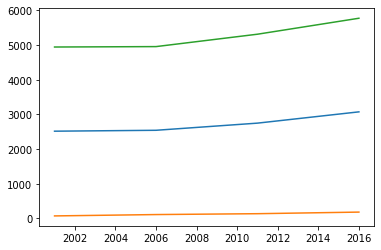

In [10]:
plt.plot(gs['Year'],gs['Dwelling'])
plt.plot(gs['Year'],gs['Train'])
plt.plot(gs['Year'],gs['Population'])
plt.show()

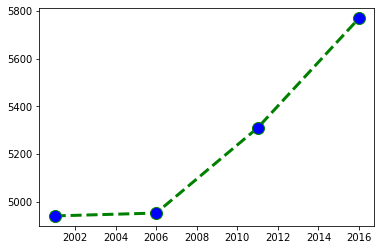

In [11]:
plt.plot(gs[['Year']],gs[['Population']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)

The data shows an uphill trend as it moves from left to right.
 
 This indicates that there is a positive relationship between Year and Population. 
 
 There is a strong assocaition between the two variables. 
 
 Outliers are not present. 

 From 2006 and 2016 we observe a gradual increase in the population

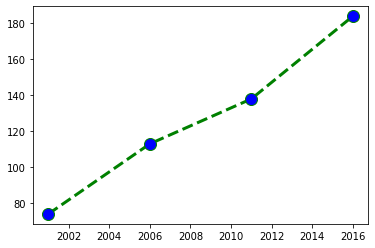

In [12]:
plt.plot(gs[['Year']],gs[['Train']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)

The data shows an uphill trend as it moves from left to right.
 
 This indicates that there is a positive relationship between Year and Train. 
 
 There is a strong assocaition between the two variables. 
 
 Outliers are not present. 

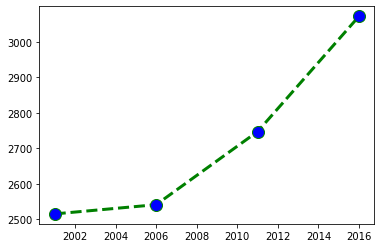

In [13]:
plt.plot(gs[['Year']],gs[['Dwelling']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12) 

The data shows an uphill trend as it moves from left to right.
 
 This indicates that there is a positive relationship between Year and Population. 
 
 There is a strong assocaition between the two variables. 
 
 Outliers are not present. 

 We observe a gradual increase in dwellings from 2001 to 2016

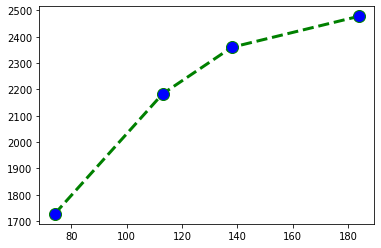

In [14]:
plt.plot(gs[['Train']],gs[['Employment']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12) 

Working on the Waurn Ponds suburbs data. Suburbs close to Waurn Ponds station are Armstrong creek, Grovedale, Herne Hill and Highton. The station was build in 2014 to create enough space for trains to pass each other allowing more geelong services to be extend and improving the service reliability. 

People from these suburbs including waurn ponds might travel for work using the waurn ponds station to geelong, melbourne and other regions. 

In [15]:
# Waurn Ponds station
wps = {'Year':[2001,2006,2011,2016],'Dwelling':[476,971,1302,1537], 'Employment':[770,1609,2195,2772],'Train':[12,38,27,75],'Population':[1600,3245,4102,5305]}
wps = pd.DataFrame(wps)
wps

,Year,Dwelling,Employment,Train,Population
0,2001,476,770,12,1600
1,2006,971,1609,38,3245
2,2011,1302,2195,27,4102
3,2016,1537,2772,75,5305


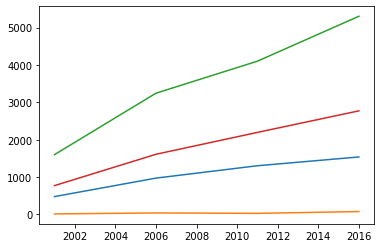

In [16]:
plt.plot(wps['Year'],wps['Dwelling'])
plt.plot(wps['Year'],wps['Train'])
plt.plot(wps['Year'],wps['Population'])
plt.plot(wps['Year'],wps['Employment'])
plt.show()

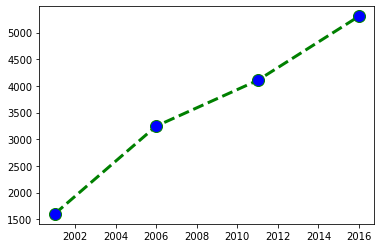

In [17]:
plt.plot(wps[['Year']],wps[['Population']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)

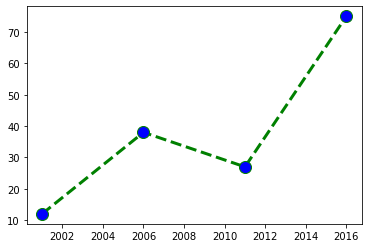

In [18]:
plt.plot(wps[['Year']],wps[['Train']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)

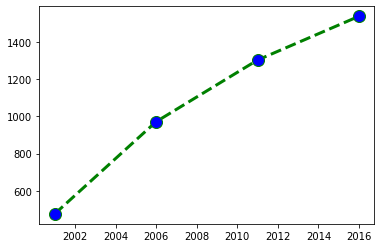

In [19]:
plt.plot(wps[['Year']],wps[['Dwelling']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12) 

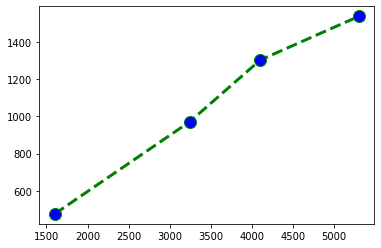

In [20]:
plt.plot(wps[['Population']],wps[['Dwelling']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)

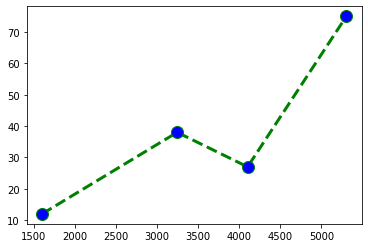

In [21]:
plt.plot(wps[['Population']],wps[['Train']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)

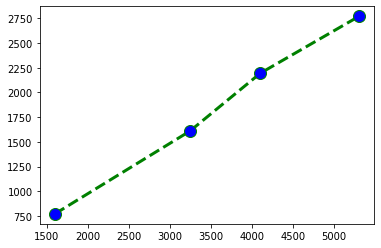

In [22]:
plt.plot(wps[['Population']],wps[['Employment']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)

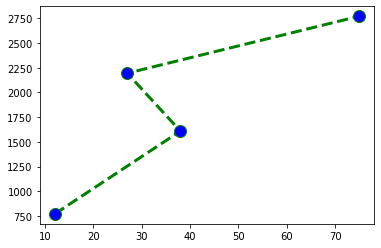

In [23]:
plt.plot(wps[['Train']],wps[['Employment']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)

Working on the south geelong suburb. The suburbs close to the south geelong station are Newtown, Geelong, East Geelong. 

People from these suburbs including south geelong might travel for work using the south geelong station to geelong, melbourne and other regions. 

In [24]:
# south geelong station
sg = {'Year':[2001,2006,2011,2016],'Dwelling':[1667, 1792, 1831, 1912], "Employment" : [1340, 1370, 1562, 1608], 'Train':[45, 35, 62, 70],'Population':[3434, 3497, 3548, 3619]}
sg = pd.DataFrame(sg)
sg

,Year,Dwelling,Employment,Train,Population
0,2001,1667,1340,45,3434
1,2006,1792,1370,35,3497
2,2011,1831,1562,62,3548
3,2016,1912,1608,70,3619


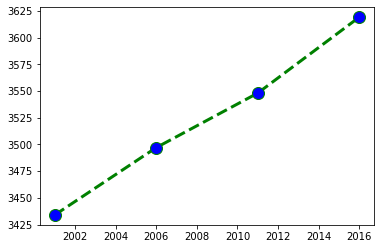

In [25]:
plt.plot(sg[['Year']],sg[['Population']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)

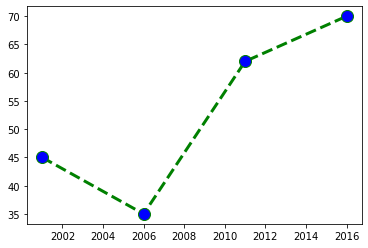

In [26]:
plt.plot(sg[['Year']],sg[['Train']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)

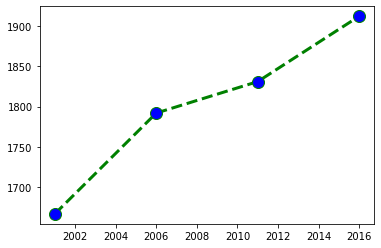

In [27]:
plt.plot(sg[['Year']],sg[['Dwelling']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)

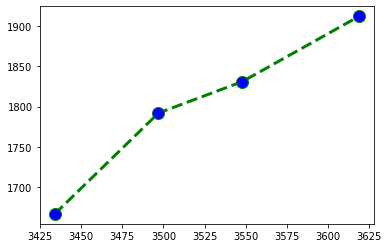

In [28]:
plt.plot(sg[['Population']],sg[['Dwelling']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)

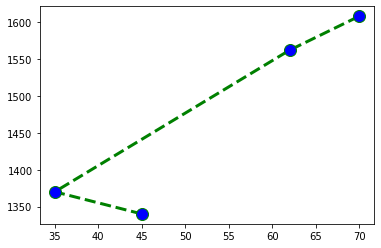

In [29]:
plt.plot(sg[['Train']],sg[['Employment']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)

Working on Corio suburbs data. The suburbs close to the corio station are north geelong, bell park. 

People from these suburbs including Corio might travel for work from corio station to geelong, melbourne and other regions. 

In [30]:
# Corio Station
co = {'Year':[2001,2006,2011,2016],'Dwelling':[5764, 5916, 6080, 6200], "Employment" : [5177, 5275, 5450, 5122], 'Train':[105, 87, 52, 108],'Population':[15315, 14944, 15199, 15292]}
co = pd.DataFrame(co)
co

,Year,Dwelling,Employment,Train,Population
0,2001,5764,5177,105,15315
1,2006,5916,5275,87,14944
2,2011,6080,5450,52,15199
3,2016,6200,5122,108,15292


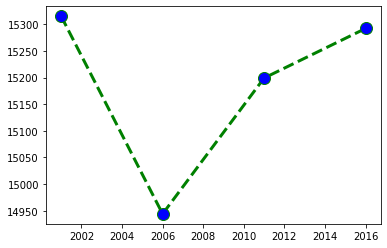

In [31]:
plt.plot(co[['Year']],co[['Population']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)

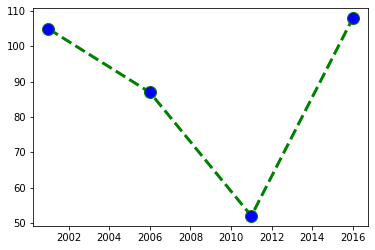

In [32]:
plt.plot(co[['Year']],co[['Train']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)

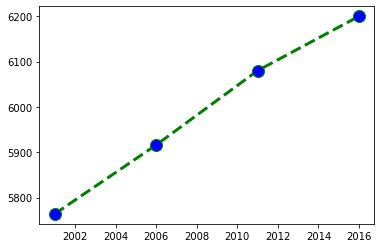

In [33]:
plt.plot(co[['Year']],co[['Dwelling']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)

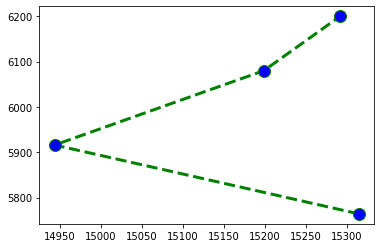

In [34]:
plt.plot(co[['Population']],co[['Dwelling']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)

Wokring with Lara suburbs data. The suburbs close to lara station is corio. 

Lara suburb is an industrial area with high employment number and a lot of people travel by train for work from geelong, melbourne, corio and other remote regions. 


In [35]:
# Lara Station
ls = {'Year':[2001,2006,2011,2016],'Dwelling':[3852, 4401, 5041, 5860], "Employment":[5185, 5866, 6615, 7570], 'Train':[313, 289, 482, 540],'Population':[11087, 12639, 13914, 16358]}
ls = pd.DataFrame(ls)
ls

,Year,Dwelling,Employment,Train,Population
0,2001,3852,5185,313,11087
1,2006,4401,5866,289,12639
2,2011,5041,6615,482,13914
3,2016,5860,7570,540,16358


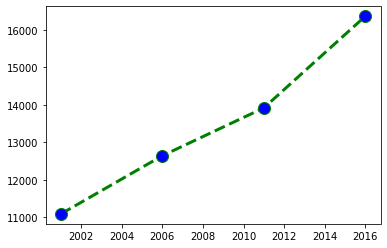

In [36]:
plt.plot(ls[['Year']],ls[['Population']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)

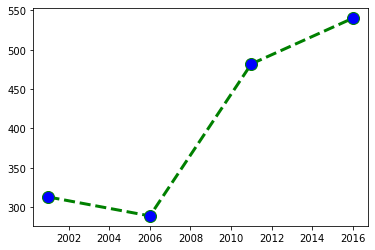

In [37]:
plt.plot(ls[['Year']],ls[['Train']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)

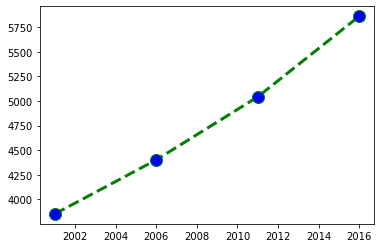

In [38]:
plt.plot(ls[['Year']],ls[['Dwelling']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)

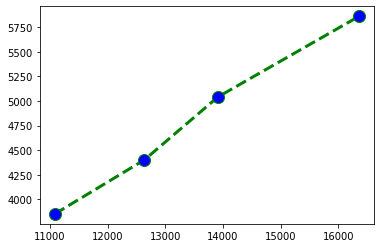

In [39]:
plt.plot(ls[['Population']],ls[['Dwelling']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)

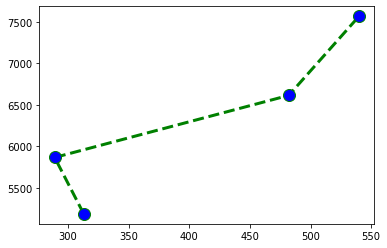

In [40]:
plt.plot(ls[['Train']],ls[['Employment']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)

Wokring with Marshall data. Suburbs close to MArshall are Belmont, Breakwater, Connewarre, Grovedale and Moolap. 

People from these suburbs including Marshall might travel for work using the marshall station to geelong, melbourne and other regions. 

In [41]:
# Marshall Station
ms = {'Year':[2001,2006,2011,2016],'Dwelling':[481, 566, 733, 1008], "Employment" : [448, 441, 683, 927], 'Train':[2, 6, 33, 37],'Population':[1167, 1288, 1769, 2243]}
ms = pd.DataFrame(ms)
ms

,Year,Dwelling,Employment,Train,Population
0,2001,481,448,2,1167
1,2006,566,441,6,1288
2,2011,733,683,33,1769
3,2016,1008,927,37,2243


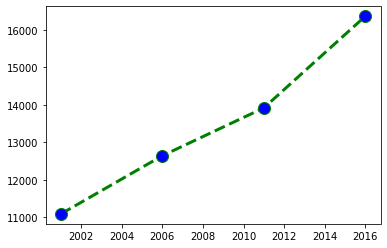

In [42]:
plt.plot(ls[['Year']],ls[['Population']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)

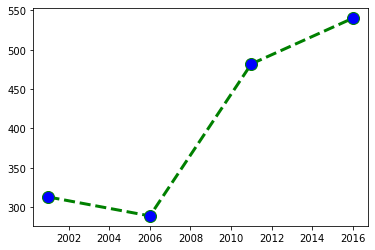

In [43]:
plt.plot(ls[['Year']],ls[['Train']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)

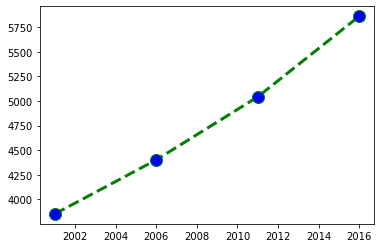

In [44]:
plt.plot(ls[['Year']],ls[['Dwelling']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)

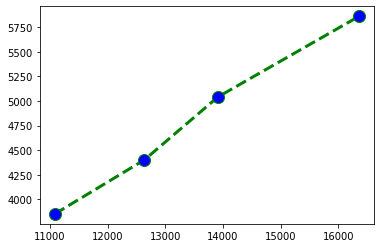

In [45]:
plt.plot(ls[['Population']],ls[['Dwelling']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)

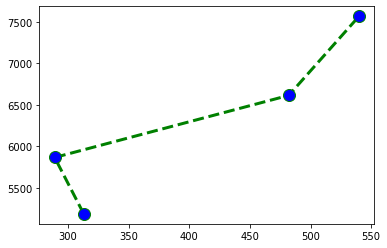

In [46]:
plt.plot(ls[['Train']],ls[['Employment']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)

Working with the north geelong data. The suburbs close to the north geelong station are Bell Park, Herne Hill, North Shore. 

People from these suburbs including north geelong might travel for work using the north geelong station to geelong, melbourne and other regions. 

In [47]:
# north geelong station
ngs = {'Year':[2001,2006,2011,2016],'Dwelling':[1279, 1309, 1326, 1601], "Employment" : [1042, 1123, 1230, 1560], 'Train':[45, 48, 80, 114],'Population':[2955, 3026, 2893, 3843]}
ngs = pd.DataFrame(ngs)
ngs

,Year,Dwelling,Employment,Train,Population
0,2001,1279,1042,45,2955
1,2006,1309,1123,48,3026
2,2011,1326,1230,80,2893
3,2016,1601,1560,114,3843


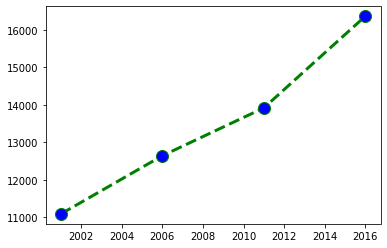

In [48]:
plt.plot(ls[['Year']],ls[['Population']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)

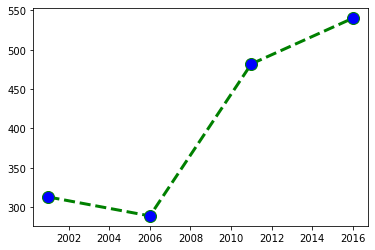

In [49]:
plt.plot(ls[["Year"]],ls[['Train']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)

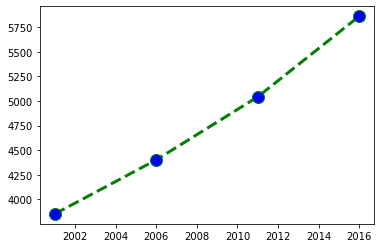

In [50]:
plt.plot(ls[['Year']],ls[['Dwelling']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)

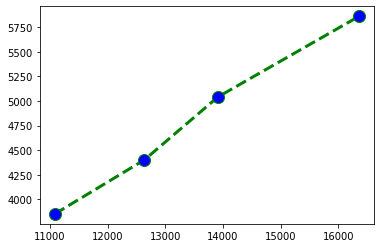

In [51]:
plt.plot(ls[['Population']],ls[['Dwelling']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)

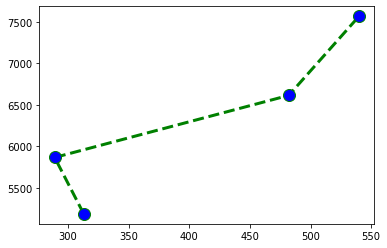

In [52]:
plt.plot(ls[['Train']],ls[['Employment']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)

In [53]:
area

,Area,Total dwellings_2016,Total dwellings_2011,Total dwellings_2006,Total dwellings_2001,Train_2016,Train_2011,Train_2006,Train_2001,pop_2016,pop_2011,pop_2006,pop_2001
1,North Geelong - Rippleside,1601,1326,1309,1279,114,80,48,45,3843,2893,3026,2955
17,Corio,6200,6080,5916,5764,108,52,87,105,15292,15199,14944,15315
18,Geelong,3072,2747,2541,2515,184,138,113,74,5769,5309,4952,4940
21,Marshall - Charlemont,1008,733,566,481,37,33,6,2,2243,1769,1288,1167
22,Lara,5860,5041,4401,3852,540,482,289,313,16358,13914,12639,11087
23,South Geelong - Thomson - Breakwater,1912,1831,1792,1667,70,62,35,45,3619,3548,3497,3434
28,Waurn Ponds - Ceres,1537,1302,971,476,75,27,38,12,5305,4102,3245,1600


In [0]:
plt.plot(p[['Total dwellings_2016']],p[['pop_2016']] , color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 

In [54]:
area1

,Area,Total dwellings_2016,Total dwellings_2011,Total dwellings_2006,Total dwellings_2001,Train_2016,Train_2011,Train_2006,Train_2001,pop_2016,pop_2011,pop_2006,pop_2001
0,Leopold,5219,4075,3318,2839,107,75,80,66,12814,10117,8818,7654
2,Bell Post Hill,2171,2165,2116,2053,64,32,50,58,4914,5016,5135,5370
3,Barwon Heads - Connewarre - Breamlea,2558,2345,1827,1827,97,74,24,18,4554,4046,2873,2953
4,East Geelong,1832,1756,1780,1742,117,107,56,70,3865,3812,3843,3742
5,Whittington,1839,1778,1714,1680,35,24,13,22,3879,4068,4052,4239
6,Rural North,652,668,638,651,38,34,34,31,1734,1608,1769,1676
7,Norlane - North Shore,4342,3936,3922,4000,80,27,80,56,8669,8314,8229,8975
8,Clifton Springs,3412,3271,3039,2632,66,54,26,25,7521,7554,7206,6826
9,Curlewis,614,100,93,85,15,0,1,1,1557,222,210,242
10,Central Geelong,885,722,552,583,51,29,18,19,1464,1326,993,1056


The report contains the explanation of the threshold value set for geelong station and its comparision with the threshold value of Waurn ponds station